# **Library and Documentation**

In [84]:
import pandas as pd

# Tokenizers divide strings into lists of substrings. For example, tokenizers can be used to find the words and punctuation in a string
# docs : https://www.nltk.org/api/nltk.tokenize.html
import nltk
  
# Convert a collection of text documents to a matrix of token counts
# docs : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

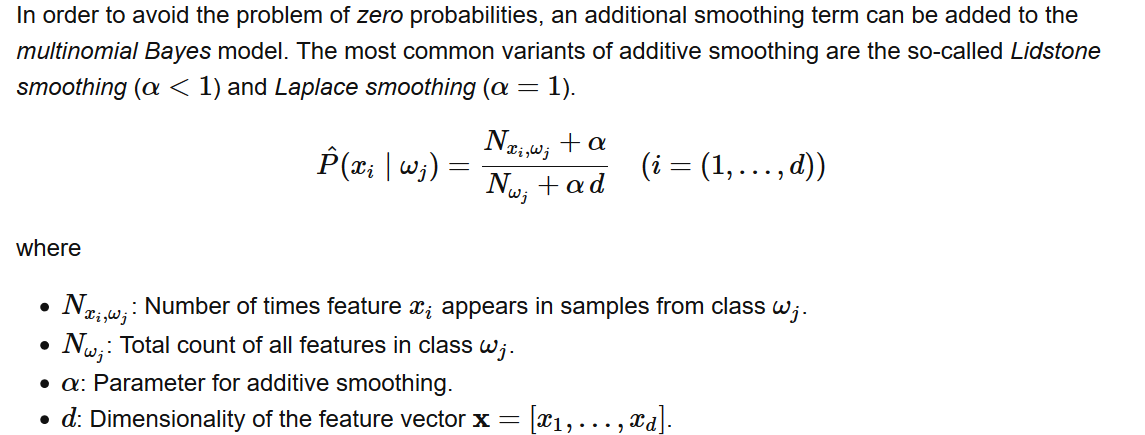

# **Dataset**

In [55]:
columns = ['sent', 'class']

rows = [['Aku suka sama dia', 'stmt'],
        ['Tapi dia engga suka sama aku', 'stmt'],
        ['kapan kita menikah', 'question'],
        ['Siapa jodohku nanti', 'question'],
        ['Apakah kamu mau menikah dengan aku', 'question'],
        ['Dia milik aku ', 'stmt'],
        ['Aku menyukai seseorang yang cantik', 'stmt'],
        ['Apa yang kamu harapkan dariku', 'question']]

df_train = pd.DataFrame(rows, columns=columns)

# **Data Exploration And Preprocessing**

In [56]:
df_train

,sent,class
0,Aku suka sama dia,stmt
1,Tapi dia engga suka sama aku,stmt
2,kapan kita menikah,question
3,Siapa jodohku nanti,question
4,Apakah kamu mau menikah dengan aku,question
5,Dia milik aku,stmt
6,Aku menyukai seseorang yang cantik,stmt
7,Apa yang kamu harapkan dariku,question


In [57]:
# get all statement on dataset
stmt_corpus = [row['sent'] for index,row in df_train.iterrows() if row['class'] == 'stmt']
stmt_corpus

['Aku suka sama dia',
 'Tapi dia engga suka sama aku',
 'Dia milik aku ',
 'Aku menyukai seseorang yang cantik']

In [58]:
vec_s = CountVectorizer()
X_s = vec_s.fit_transform(stmt_corpus)
#X_s.get_feature_names_out()

In [59]:
# get array extraction number of corpus
X_s.toarray()

array([[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]])

In [60]:
# get all feature word in corpus statement
vec_s.get_feature_names_out()

array(['aku', 'cantik', 'dia', 'engga', 'menyukai', 'milik', 'sama',
       'seseorang', 'suka', 'tapi', 'yang'], dtype=object)

CountVectorizer gives Term-Document Matrix (TDM) for each class. A term-document matrix (TDM) consists of a list of word frequencies appearing in a set of documents.

In [61]:
# process data statement
tdm_s = pd.DataFrame(X_s.toarray(), columns=vec_s.get_feature_names_out())
tdm_s

,aku,cantik,dia,engga,menyukai,milik,sama,seseorang,suka,tapi,yang
0,1,0,1,0,0,0,1,0,1,0,0
1,1,0,1,1,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1


In [62]:
# process data question
q_corpus = [row['sent'] for index,row in df_train.iterrows() if row['class'] == 'question']

vec_q = CountVectorizer()
X_q = vec_q.fit_transform(q_corpus)
tdm_q = pd.DataFrame(X_q.toarray(), columns=vec_q.get_feature_names_out())

tdm_q

,aku,apa,apakah,dariku,dengan,harapkan,jodohku,kamu,kapan,kita,mau,menikah,nanti,siapa,yang
0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0
3,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1


In [63]:
# count word in corpus statement
word_list_s = vec_s.get_feature_names_out();    
count_list_s = X_s.toarray().sum(axis=0) 
print(type(count_list_s), type(word_list_s))
freq_s = dict(zip(word_list_s,count_list_s))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [64]:
freq_s

{'aku': 4,
 'cantik': 1,
 'dia': 3,
 'engga': 1,
 'menyukai': 1,
 'milik': 1,
 'sama': 2,
 'seseorang': 1,
 'suka': 2,
 'tapi': 1,
 'yang': 1}

In [65]:
# count word in corpus question
word_list_q = vec_q.get_feature_names_out();    
count_list_q = X_q.toarray().sum(axis=0) 
freq_q = dict(zip(word_list_q,count_list_q))
freq_q

{'aku': 1,
 'apa': 1,
 'apakah': 1,
 'dariku': 1,
 'dengan': 1,
 'harapkan': 1,
 'jodohku': 1,
 'kamu': 2,
 'kapan': 1,
 'kita': 1,
 'mau': 1,
 'menikah': 2,
 'nanti': 1,
 'siapa': 1,
 'yang': 1}

In [74]:
docs = [row['sent'] for index,row in df_train.iterrows()]
vec = CountVectorizer()
X = vec.fit_transform(docs)
total_features = len(vec.get_feature_names_out())
print('Total Feature :',total_features)

Total Feature : 24


In [80]:
total_cnts_features_s = count_list_s.sum(axis=0)
print('Total Feature S :',total_cnts_features_s)
total_cnts_features_q = count_list_q.sum(axis=0)
print('Total Feature Q :',total_cnts_features_q)

Total Feature S : 18
Total Feature Q : 17


In [96]:
from nltk.tokenize import word_tokenize
sentence = 'Apa aku sayang kamu'
tokens = word_tokenize(sentence)
tokens


['Apa', 'aku', 'sayang', 'kamu']

In [97]:
prob_s_with_ls = []
for word in tokens:
    if word in freq_s.keys():
        count = freq_s[word]
    else:
        count = 0
    prob_s_with_ls.append((count + 1)/(total_cnts_features_s + total_features))
dict(zip(tokens,prob_s_with_ls))

{'Apa': 0.023809523809523808,
 'aku': 0.11904761904761904,
 'kamu': 0.023809523809523808,
 'sayang': 0.023809523809523808}

In [98]:
prob_q_with_ls = []
for word in tokens:
    if word in freq_q.keys():
        count = freq_q[word]
    else:
        count = 0
    prob_q_with_ls.append((count + 1)/(total_cnts_features_q + total_features))
dict(zip(tokens,prob_q_with_ls))

{'Apa': 0.024390243902439025,
 'aku': 0.04878048780487805,
 'kamu': 0.07317073170731707,
 'sayang': 0.024390243902439025}